<a href="https://colab.research.google.com/github/M20Jay/Data-Science-Portfolio/blob/main/Energy-Consumption-Analysis-HVAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading Dataset
df= pd.read_excel("/content/drive/MyDrive/Python Dataset/Datasets/Individual Assignment 1.xls")

In [ ]:
df.head()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
0,270,15,30,2.0,Residential,Central AC,28,380
1,273,20,28,1.5,Commercial,Split AC,26,420
2,276,18,26,1.8,Residential,Window AC,24,390
3,276,12,32,2.5,Residential,Central AC,32,320
4,276,22,20,1.2,Commercial,Split AC,18,480


In [ ]:
# Cleaning of data
df.dropna(inplace=True)

In [ ]:
# coding categorical variable "Building Type" and "HVAC System"

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
df['Building Type'] = label_encoder.fit_transform(df['Building Type'])
df['HVAC System'] = label_encoder.fit_transform(df['HVAC System'])

In [ ]:
df.head(5)

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
0,270,15,30,2.0,1,0,28,380
1,273,20,28,1.5,0,1,26,420
2,276,18,26,1.8,1,2,24,390
3,276,12,32,2.5,1,0,32,320
4,276,22,20,1.2,0,1,18,480


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix


,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
Room Area (sq. ft.),1.000000,0.056081,0.026742,-0.055989,0.060953,0.176850,0.032260,0.039561
Number of Appliances,0.056081,1.000000,-0.514895,-0.981021,-0.404142,-0.054570,-0.517361,0.956444
Outside Temperature (C),0.026742,-0.514895,1.000000,0.545982,0.127302,0.079896,0.992592,-0.654513
Insulation Thickness (inches),-0.055989,-0.981021,0.545982,1.000000,0.403505,0.087806,0.553828,-0.979500
Building Type,0.060953,-0.404142,0.127302,0.403505,1.000000,-0.061546,0.147999,-0.363122
HVAC System,0.176850,-0.054570,0.079896,0.087806,-0.061546,1.000000,0.070726,-0.094024
Average Temperature in last 24 hours (C),0.032260,-0.517361,0.992592,0.553828,0.147999,0.070726,1.000000,-0.656186
Energy Consumption (kWh),0.039561,0.956444,-0.654513,-0.979500,-0.363122,-0.094024,-0.656186,1.000000


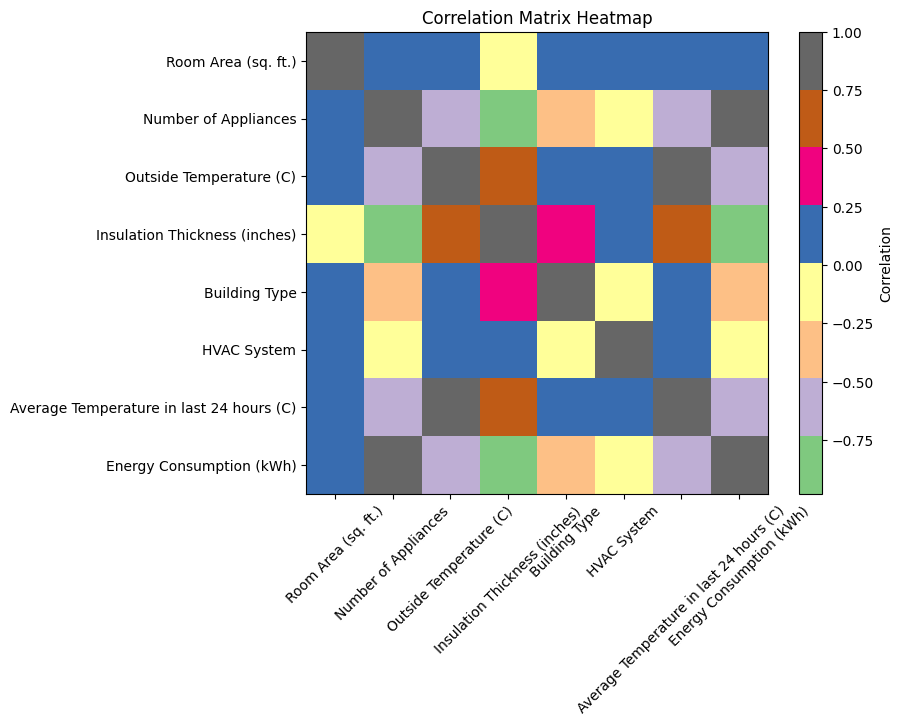

Correlation Matrix:
                                          Room Area (sq. ft.)  \
Room Area (sq. ft.)                                  1.000000   
Number of Appliances                                 0.056081   
Outside Temperature (C)                              0.026742   
Insulation Thickness (inches)                       -0.055989   
Building Type                                        0.060953   
HVAC System                                          0.176850   
Average Temperature in last 24 hours (C)             0.032260   
Energy Consumption (kWh)                             0.039561   

                                          Number of Appliances  \
Room Area (sq. ft.)                                   0.056081   
Number of Appliances                                  1.000000   
Outside Temperature (C)                              -0.514895   
Insulation Thickness (inches)                        -0.981021   
Building Type                                        -0.404142  

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='Accent', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Print the correlation values
print("Correlation Matrix:")
print(correlation_matrix)

In [ ]:
# a) using Random Forest - Identification of any feature that may not contribute significantly to prediction accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Separate features (X) and target variable (y)
X = df.drop(columns=['Energy Consumption (kWh)'])
y = df['Energy Consumption (kWh)']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Building Type', 'HVAC System'])

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the model to your data
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

                                    Feature  Importance
3             Insulation Thickness (inches)    0.552008
1                      Number of Appliances    0.363870
2                   Outside Temperature (C)    0.044490
4  Average Temperature in last 24 hours (C)    0.031741
0                       Room Area (sq. ft.)    0.004322
8                             HVAC System_1    0.001117
7                             HVAC System_0    0.000937
6                           Building Type_1    0.000773
9                             HVAC System_2    0.000389
5                           Building Type_0    0.000353


In [ ]:
# Applying multiple linear regression to build a prediction model for energy consumption (y) based on the features
df1 = pd.DataFrame(df)
X = df1[['Room Area (sq. ft.)', 'Number of Appliances', 'Outside Temperature (C)', 'Insulation Thickness (inches)', 'Building Type', 'HVAC System', 'Average Temperature in last 24 hours (C)']]
y = df1['Energy Consumption (kWh)']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making predictions for point1, point2, and point3
points = {
    'Point 1': [279, 16, 20, 1.7, 19, 1, 0],  # Residential, Central AC
    'Point 2': [277, 22, 15, 1.5, 14, 0, 1],  # Commercial, Split AC
    'Point 3': [276, 14, 25, 2.2, 26, 1, 2]   # Residential, Window AC
}

predictions = {}
for point, features in points.items():
    energy_consumption_pred = model.predict([features])[0]
    predictions[point] = energy_consumption_pred

# Print the predictions
for point, energy_consumption_pred in predictions.items():
    print(f'{point}: Predicted Energy Consumption (kWh): {energy_consumption_pred:.2f}')

Point 1: Predicted Energy Consumption (kWh): 384.11
Point 2: Predicted Energy Consumption (kWh): 418.30
Point 3: Predicted Energy Consumption (kWh): 320.11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Computing the Mean Squared Error(MSE)regression loss
from sklearn.metrics import mean_squared_error
y_pred_test = model.predict(X_test)  # Replace 'model' with your regression model

# Calculate Mean Squared Error (MSE) for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)

# Print or use the MSE value as needed
print(f"Mean Squared Error (MSE) for Testing Set: {mse_test:.2f}")

Mean Squared Error (MSE) for Testing Set: 42.93
